# Customer Analytics in FMGC Industry (Part-2)

### 1. Importing the libraries

In [32]:
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression


sns.set()
plt.rc("font", size=14)
warnings.filterwarnings("ignore")
pd.set_option('display.max_column',None)
sns.set(style="whitegrid", color_codes=True)

### 2. Data Preparation

In [30]:
#Load Data
purchase_df = pd.read_csv("/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/purchase data.csv", index_col=0)

#Import Scaler,PCA,KMeans
scaler = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/scaler.pickle','rb'))
pca = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/pca.pickle','rb'))
kmeans_pca = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/kmeans_pca.pickle','rb'))

#making both of these cols as normal first by doing log normal transformation
purchase_df['age_log'] = np.log(purchase_df['Age'])
purchase_df['income_log'] = np.log(purchase_df['Income'])

#standardization
features = purchase_df[['Sex','Marital status','Education','Occupation','Settlement size','age_log','income_log']]
purchase_segm_std = scaler.transform(features)

#apply pca
purchase_segm_pca = pca.transform(purchase_segm_std)

#segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(purchase_segm_pca)

# Create a copy of the data frame
purchase_predictors = purchase_df.copy()

# Add segment labels to purchase_predictors DataFrame
purchase_predictors['Segment'] = purchase_segm_kmeans_pca

# Create segment dummies DataFrame
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix='Segment', prefix_sep='_')

# Add ID column to segment dummies DataFrame
segment_dummies['ID'] = purchase_predictors.index

# Set ID as index of segment dummies DataFrame
segment_dummies = segment_dummies.set_index('ID')

# Merge purchase_predictors and segment dummies DataFrames on ID column
purchase_predictors = pd.concat([purchase_predictors, segment_dummies], axis=1)

In [31]:
purchase_predictors.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,age_log,income_log,Segment,Segment_0,Segment_1,Segment_2,Segment_3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0


In [33]:
df_pa = purchase_predictors.copy()
df_pa.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,age_log,income_log,Segment,Segment_0,Segment_1,Segment_2,Segment_3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0,1,0,0,0


##### 1. Modelling Purchase Incidence
- Purchase Probability Model
- Price Elasticity of Purchase Probability
- Purchase Elasticity by Segments
- Purchase Probability with Promotion Feature

##### 1.1 Purchase Probability Model 
- purchase probability provides an opportunity for real time web marketing by predicting the purchase probability of an anonymous customer.

In [49]:
y = df_pa['Incidence'].values
X = df_pa.iloc[:,6:11].mean(axis=1).values

In [55]:
X = X.reshape(-1,1)

In [56]:
Logitmodel_purchase = LogisticRegression(solver='sag')
Logitmodel_purchase.fit(X,y)

LogisticRegression(solver='sag')

In [57]:
Logitmodel_purchase.coef_

array([[-2.34782431]])

> The coefficient for price is negative, indictating that with the increase in price the purchase probability decreases. This model quantifies the exact relationship between price and probability of purchase.

##### Price Elasticity of Purchase Probability
This model quantifies the exact relationship between price and probability of purchase.
Price Elasticity means that the percentage change in purchase probability and response to a 1% change in respective aggregate price for product category.

Not only direction but magnitude of the effect of price on purchase 

<B>EXAMPLE:</B> If price increases by 10% and consumers respond by decreasing purchases by 20%, the equation computes the elasticity coefficient as -2. The result is negative because an increase in price (a positive number) leads to a decrease in purchases (a negative number)

In [59]:
# Turn off scientific notation in pandas 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.00,58693.00,58693.00,58693.00,58693.00
mean,1.39,1.78,2.01,2.16,2.65
std,0.09,0.17,0.05,0.09,0.10
min,1.10,1.26,1.87,1.76,2.11
25%,1.34,1.58,1.97,2.12,2.63
50%,1.39,1.88,2.01,2.17,2.67
75%,1.47,1.89,2.06,2.24,2.70
max,1.59,1.90,2.14,2.26,2.80


> The minimum price of chocolates is 1.10 dollars and the maximum price is 2.80. I expand this price range somewhat to gain a better understanding of how the purchase probabilities and the respective elasticities change. in this analysis I chose the price range between
0.5 and 3.5. 

In [61]:
#Keeping the prices in the range of 0.5-3.5, so that we can see the purchase prob
price_range = np.arange(0.5,3.5,0.01)
price_range_df = pd.DataFrame(price_range)

In [62]:
#predicting the purchase prob for newly defined range
output_pred = Logitmodel_purchase.predict_proba(price_range_df)

In [63]:
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# The second the probability for purchase for each price point in our price range.
purchase_prob = output_pred[:][:, 1]

[Price Elasticity - Reference](https://365datascience.com/price-elasticity/)
$$ E = \beta*price*(1-Pr(Purchase)) $$ 

The elasticities explains how does demand for the product change with a given change in price.

3 kinds:
- Purchase probability – Will a customer buy a product from a particular product category when they enter the shop?
- Brand choice probability – Which brand is the customer going to choose?
- Purchase quantity – How many units is the customer going to purchase?

In [67]:
price_elasticity = Logitmodel_purchase.coef_[:,0] * price_range * (1 - purchase_prob)

In [70]:
price_elasticities_df = pd.DataFrame({'Price_Point':price_range,'Mean_PE':price_elasticity})
price_elasticities_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Price_Point,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.60,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.70,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,2.99,3.00,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.40,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49
Mean_PE,-0.10,-0.10,-0.10,-0.11,-0.11,-0.12,-0.12,-0.13,-0.13,-0.14,-0.14,-0.15,-0.15,-0.16,-0.17,-0.17,-0.18,-0.19,-0.19,-0.20,-0.21,-0.21,-0.22,-0.23,-0.24,-0.24,-0.25,-0.26,-0.27,-0.28,-0.29,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.41,-0.42,-0.43,-0.44,-0.46,-0.47,-0.48,-0.50,-0.51,-0.53,-0.54,-0.56,-0.57,-0.59,-0.61,-0.62,-0.64,-0.66,-0.67,-0.69,-0.71,-0.73,-0.75,-0.77,-0.79,-0.81,-0.83,-0.85,-0.87,-0.89,-0.91,-0.94,-0.96,-0.98,-1.00,-1.03,-1.05,-1.08,-1.10,-1.13,-1.15,-1.18,-1.20,-1.23,-1.26,-1.29,-1.31,-1.34,-1.37,-1.40,-1.43,-1.46,-1.49,-1.52,-1.55,-1.58,-1.61,-1.64,-1.67,-1.70,-1.73,-1.77,-1.80,-1.83,-1.87,-1.90,-1.93,-1.97,-2.00,-2.04,-2.07,-2.11,-2.14,-2.18,-2.21,-2.25,-2.28,-2.32,-2.36,-2.39,-2.43,-2.47,-2.50,-2.54,-2.58,-2.61,-2.65,-2.69,-2.73,-2.77,-2.80,-2.84,-2.88,-2.92,-2.95,-2.99,-3.03,-3.07,-3.11,-3.15,-3.18,-3.22,-3.26,-3.30,-3.34,-3.38,-3.41,-3.45,-3.49,-3.53,-3.57,-3.61,-3.64,-3.68,-3.72,-3.76,-3.80,-3.83,-3.87,-3.91,-3.95,-3.98,-4.02,-4.06,-4.10,-4.13,-4.17,-4.21,-4.24,-4.28,-4.32,-4.35,-4.39,-4.43,-4.46,-4.50,-4.53,-4.57,-4.61,-4.64,-4.68,-4.71,-4.75,-4.78,-4.82,-4.85,-4.89,-4.92,-4.96,-4.99,-5.02,-5.06,-5.09,-5.13,-5.16,-5.19,-5.23,-5.26,-5.29,-5.33,-5.36,-5.39,-5.42,-5.46,-5.49,-5.52,-5.55,-5.58,-5.62,-5.65,-5.68,-5.71,-5.74,-5.77,-5.80,-5.84,-5.87,-5.90,-5.93,-5.96,-5.99,-6.02,-6.05,-6.08,-6.11,-6.14,-6.17,-6.20,-6.23,-6.26,-6.

> Now, we have the magnitude of price elasticities at each price point. The following plot shows the entire elasticity curve visually and how the elasticity changes compared to the price range as a function the price elasticity decreases as price increases.

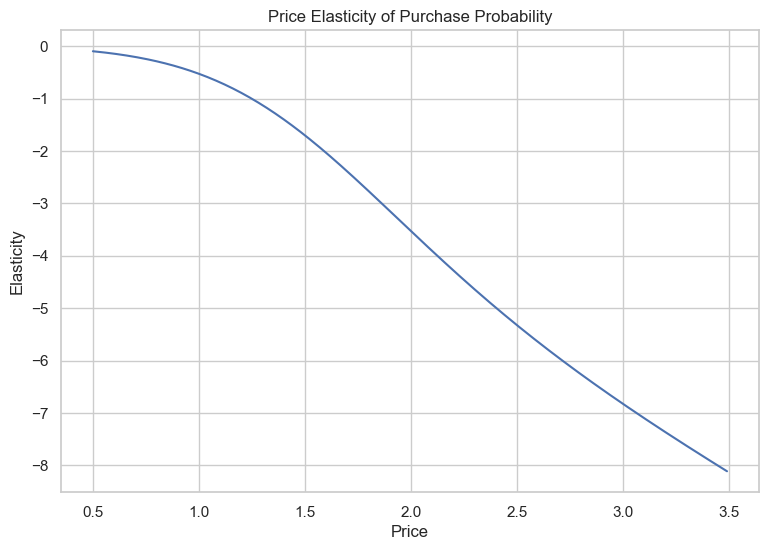

In [72]:
plt.figure(figsize= (9,6))
plt.plot(price_range, price_elasticity, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()

> The above plot shows that higher the price of out product less likely will the customers buy it(which is obvious, so we need to have a middle point)
>- The decrease in price is slow in the range between (0.5, 1.2), and then it becomes steeper after the point 1.1. 
>- The fact that the price elasticities are all negative is consistent with the negative model’s price coefficient: -2.34. 

> Note that "Elasticity" measures the percent change in an output variable by definition. If the percent change is greater than 100 percent, the output or purchase probability is called **"elastic"**. On the other hand, for changes less than 100 percent it is **"inelastic"**. In other words, if the elasticity has a value smaller than 1 in absolute terms we say it is **"inelastic"**. If it is greater than 1, it is **"elastic"**. <br> <br> 
>- For example, in the "price_elasticities_df" dataframe. the price elasticity at USD 1.10 price is -0.69. This means the average customer has an elasticity of -0.69. In other works, for each increase in price by 1 percent, the probability of purchase will change by -0.69 percent. 
>- The important observation here is that an increase of 1 percent in elasticity leads to a decrease of less than 1 percent.
Therefore purchase probability at this point is "inelastic". 
>- When we look at the 1.50 price the elasticity is -1.70. This implies that an increase of 1 percent in price would translate into a decline of -1.70 percent of purchase probability. Therefore an increase of 1 percent will lead to a decrease of almost 2 percent in purchase probability. In this case the elasticity of purchase probability is "elastic".
>- For inelastic values, the general recommendation is to increase the price as it wouldn't cause a significant decrease in the output variable or in our case purchase probability. On the other hand if we have elasticity which is greater than 1 in absolute terms, we should decrease the prices.
>-At the price 1,25, we can see that the price elasticity is -1.0. With prices lower than 1,25, we can increase our product price without losing too much in terms of purchase probability for prices higher than 1.25. We have more to gain by reducing our prices.  <br>

### Purchase Elasticities by Segments

In [97]:
def elasticity_model(segment,data,price_range_df,price_range):
    
    #selecting the customer as per the segment
    segment_cust = data.query('Segment  == '+str(segment))

    #filtering out input and output
    output_segm = segment_cust['Incidence']
    input_segm = pd.DataFrame()
    input_segm['Mean Price'] = segment_cust.iloc[:,6:11].mean(axis=1)

    #making of the logistic model
    model_incidence_segm = LogisticRegression(solver='sag')
    model_incidence_segm.fit(input_segm, output_segm)

    #calculating the elasticties
    Y_segm = model_incidence_segm.predict_proba(price_range_df)
    purchase_prob_segm = Y_segm[:][: , 1]
    pe_segm = model_incidence_segm.coef_ * price_range * (1 -  purchase_prob_segm)

    return pe_segm,model_incidence_segm

In [100]:
# Segment 0: Career Oriented
pe_segm0, model_incidence_segm0 = elasticity_model(0,df_pa,price_range_df,price_range)

# Segment 1: Fewer-Opportunities
pe_segm1, model_incidence_segm1 = elasticity_model(1,df_pa,price_range_df,price_range)

# Segment 2: Well-Offs
pe_segm2, model_incidence_segm2 = elasticity_model(2,df_pa,price_range_df,price_range)

# Segment 3: Standard
pe_segm3, model_incidence_segm3 = elasticity_model(3,df_pa,price_range_df,price_range)

In [110]:
df_price_elasticities = pd.DataFrame({'Price Point':price_range,
                                      'Mean PE':price_elasticity,
                                      'PE_Segment_0_CF':pe_segm0[0],
                                      'PE_Segment_1_FO':pe_segm1[0],
                                      'PE_Segment_2_WO':pe_segm2[0],
                                      'PE_SEegment_3_Strd':pe_segm3[0]})
df_price_elasticities.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Price Point,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.60,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.70,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,2.99,3.00,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.40,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49
Mean PE,-0.10,-0.10,-0.10,-0.11,-0.11,-0.12,-0.12,-0.13,-0.13,-0.14,-0.14,-0.15,-0.15,-0.16,-0.17,-0.17,-0.18,-0.19,-0.19,-0.20,-0.21,-0.21,-0.22,-0.23,-0.24,-0.24,-0.25,-0.26,-0.27,-0.28,-0.29,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.41,-0.42,-0.43,-0.44,-0.46,-0.47,-0.48,-0.50,-0.51,-0.53,-0.54,-0.56,-0.57,-0.59,-0.61,-0.62,-0.64,-0.66,-0.67,-0.69,-0.71,-0.73,-0.75,-0.77,-0.79,-0.81,-0.83,-0.85,-0.87,-0.89,-0.91,-0.94,-0.96,-0.98,-1.00,-1.03,-1.05,-1.08,-1.10,-1.13,-1.15,-1.18,-1.20,-1.23,-1.26,-1.29,-1.31,-1.34,-1.37,-1.40,-1.43,-1.46,-1.49,-1.52,-1.55,-1.58,-1.61,-1.64,-1.67,-1.70,-1.73,-1.77,-1.80,-1.83,-1.87,-1.90,-1.93,-1.97,-2.00,-2.04,-2.07,-2.11,-2.14,-2.18,-2.21,-2.25,-2.28,-2.32,-2.36,-2.39,-2.43,-2.47,-2.50,-2.54,-2.58,-2.61,-2.65,-2.69,-2.73,-2.77,-2.80,-2.84,-2.88,-2.92,-2.95,-2.99,-3.03,-3.07,-3.11,-3.15,-3.18,-3.22,-3.26,-3.30,-3.34,-3.38,-3.41,-3.45,-3.49,-3.53,-3.57,-3.61,-3.64,-3.68,-3.72,-3.76,-3.80,-3.83,-3.87,-3.91,-3.95,-3.98,-4.02,-4.06,-4.10,-4.13,-4.17,-4.21,-4.24,-4.28,-4.32,-4.35,-4.39,-4.43,-4.46,-4.50,-4.53,-4.57,-4.61,-4.64,-4.68,-4.71,-4.75,-4.78,-4.82,-4.85,-4.89,-4.92,-4.96,-4.99,-5.02,-5.06,-5.09,-5.13,-5.16,-5.19,-5.23,-5.26,-5.29,-5.33,-5.36,-5.39,-5.42,-5.46,-5.49,-5.52,-5.55,-5.58,-5.62,-5.65,-5.68,-5.71,-5.74,-5.77,-5.80,-5.84,-5.87,-5.90,-5.93,-5.96,-5.99,-6.02,-6.05,-6.08,-6.11,-6.14,-6.17,-6.20,-6.23,-6.26,-6.

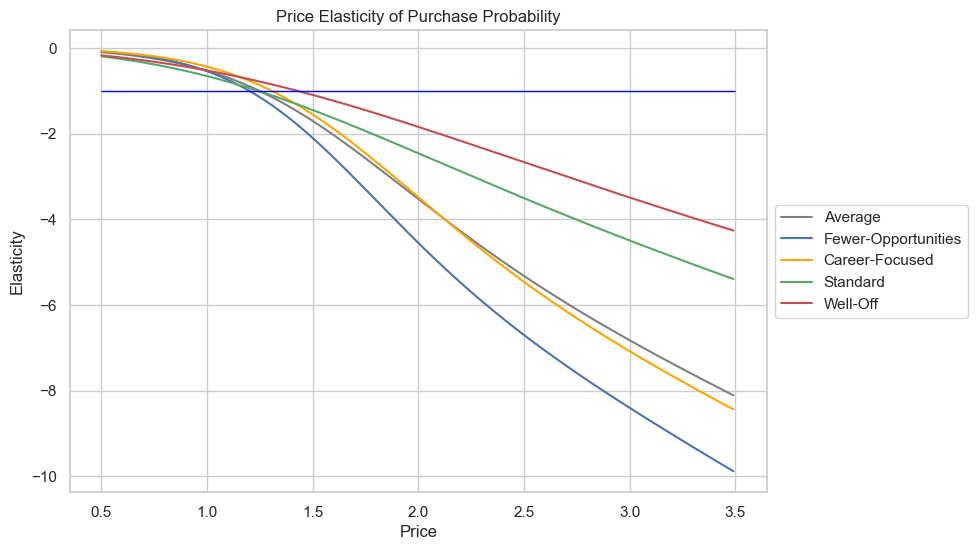

In [114]:
#Displaying all the elastities of purchase probability 
plt.figure(figsize = (9, 6))
ax1=plt.plot(price_range, price_elasticity, color = 'grey', label="Average")
ax2=plt.plot(price_range, pe_segm1[0], color = 'b', label='Fewer-Opportunities')
ax3=plt.plot(price_range, pe_segm0[0], color = 'orange', label='Career-Focused')
ax4=plt.plot(price_range, pe_segm3[0], color = 'g', label='Standard')
plt.plot(price_range, pe_segm2[0], color = 'r', label='Well-Off')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.hlines(y =-1.0, color='blue', linewidth=1, xmin = 0.5, xmax = 3.5)
# show the legend
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

>- It seems that **"Fewer Opportunities"** segment is the most price sensitive compared to the average as well as other segments. The line is not only lower but it is also much steeper. And this means that with an increase in price they become more and more elastic much faster.

>- When we see the tipping point between elasticity and in elasticity for the **"Fewer-Opportunities"** segment, it seems to stand at 1,70. Considering the average tipping point was at 1,25, this is quite interesting. This indicates that this segment is more inelastic at lower prices. This is also evident from the graph. The Blue line ("Fewer-Opportunities") is a bit higher than the other two in the beginning. Later on however it becomes much steeper. 
    - The first reason could be technical since the fewer opportunities cluster is the biggest one may maybe the abundance of data is resulting in a more sophisticated model.
    - Second reason could be related to purchasing behavior. Maybe the fewer opportunities customer enjoys chocolate candy bars so much that a price increase in the lower price ranges won't stop them from buying it. However once it starts becoming expensive it does not make any financial sense to them to invest in it. 
    
>- We observe that the **"Well-Off"** segment is the least elastic across the price range, when compared to the rest. Their purchase probability elasticity is the least affected by price.

#### Purchase Probabilty with Promotion Feature 

In [117]:
output_prom = df_pa['Incidence']
input_prom = pd.DataFrame()
input_prom['Mean Price'] = df_pa.iloc[:,6:11].mean(axis=1)
input_prom['Mean_Promotion'] = df_pa.iloc[:,11:16].mean(axis=1)

In [118]:
input_prom.head()

,Mean Price,Mean_Promotion
ID,,
200000001,2.04,0.20
200000001,2.03,0.00
200000001,2.03,0.00
200000001,2.03,0.00
200000001,2.03,0.00


In [119]:
#model
model_incidence_prom = LogisticRegression(solver='sag')
model_incidence_prom.fit(input_prom,output_prom)

#getting to know the coeff
model_incidence_prom.coef_

array([[-1.49401751,  0.56153508]])

- The coef of promotion is positive. Therefore this means that there is positive correlation between promotion and purchase probability.

#### Price Elasticity with vs without promotion

In [123]:
price_elasticity_prom = pd.DataFrame({'Price_Range':price_range,'Promotion':1})

#purchase prob with promotion model prediction
Y_promo = model_incidence_prom.predict_proba(price_elasticity_prom)
promo = Y_promo[:, 1]
price_elasticity_prom = (model_incidence_prom.coef_[:,0] * price_range) * (1 - promo)

In [128]:
price_elasticity_no_promo = pd.DataFrame({'Price_Range':price_range,'Promotion':0})

Y_no_promo = model_incidence_prom.predict_proba(price_elasticity_no_promo)
no_promo = Y_no_promo[:,1]
price_elasticity_no_promo = (model_incidence_prom.coef_[:,0] * price_range) * (1-no_promo)

In [129]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_prom
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
price_elasticities = df_price_elasticities.T
price_elasticities.to_csv('price_elasticities.csv')
price_elasticities

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Price Point,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.10,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.30,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.60,1.61,1.62,1.63,1.64,1.65,1.66,1.67,1.68,1.69,1.70,1.71,1.72,1.73,1.74,1.75,1.76,1.77,1.78,1.79,1.80,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09,2.10,2.11,2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22,2.23,2.24,2.25,2.26,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.34,2.35,2.36,2.37,2.38,2.39,2.40,2.41,2.42,2.43,2.44,2.45,2.46,2.47,2.48,2.49,2.50,2.51,2.52,2.53,2.54,2.55,2.56,2.57,2.58,2.59,2.60,2.61,2.62,2.63,2.64,2.65,2.66,2.67,2.68,2.69,2.70,2.71,2.72,2.73,2.74,2.75,2.76,2.77,2.78,2.79,2.80,2.81,2.82,2.83,2.84,2.85,2.86,2.87,2.88,2.89,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,2.99,3.00,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.14,3.15,3.16,3.17,3.18,3.19,3.20,3.21,3.22,3.23,3.24,3.25,3.26,3.27,3.28,3.29,3.30,3.31,3.32,3.33,3.34,3.35,3.36,3.37,3.38,3.39,3.40,3.41,3.42,3.43,3.44,3.45,3.46,3.47,3.48,3.49
Mean PE,-0.10,-0.10,-0.10,-0.11,-0.11,-0.12,-0.12,-0.13,-0.13,-0.14,-0.14,-0.15,-0.15,-0.16,-0.17,-0.17,-0.18,-0.19,-0.19,-0.20,-0.21,-0.21,-0.22,-0.23,-0.24,-0.24,-0.25,-0.26,-0.27,-0.28,-0.29,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.41,-0.42,-0.43,-0.44,-0.46,-0.47,-0.48,-0.50,-0.51,-0.53,-0.54,-0.56,-0.57,-0.59,-0.61,-0.62,-0.64,-0.66,-0.67,-0.69,-0.71,-0.73,-0.75,-0.77,-0.79,-0.81,-0.83,-0.85,-0.87,-0.89,-0.91,-0.94,-0.96,-0.98,-1.00,-1.03,-1.05,-1.08,-1.10,-1.13,-1.15,-1.18,-1.20,-1.23,-1.26,-1.29,-1.31,-1.34,-1.37,-1.40,-1.43,-1.46,-1.49,-1.52,-1.55,-1.58,-1.61,-1.64,-1.67,-1.70,-1.73,-1.77,-1.80,-1.83,-1.87,-1.90,-1.93,-1.97,-2.00,-2.04,-2.07,-2.11,-2.14,-2.18,-2.21,-2.25,-2.28,-2.32,-2.36,-2.39,-2.43,-2.47,-2.50,-2.54,-2.58,-2.61,-2.65,-2.69,-2.73,-2.77,-2.80,-2.84,-2.88,-2.92,-2.95,-2.99,-3.03,-3.07,-3.11,-3.15,-3.18,-3.22,-3.26,-3.30,-3.34,-3.38,-3.41,-3.45,-3.49,-3.53,-3.57,-3.61,-3.64,-3.68,-3.72,-3.76,-3.80,-3.83,-3.87,-3.91,-3.95,-3.98,-4.02,-4.06,-4.10,-4.13,-4.17,-4.21,-4.24,-4.28,-4.32,-4.35,-4.39,-4.43,-4.46,-4.50,-4.53,-4.57,-4.61,-4.64,-4.68,-4.71,-4.75,-4.78,-4.82,-4.85,-4.89,-4.92,-4.96,-4.99,-5.02,-5.06,-5.09,-5.13,-5.16,-5.19,-5.23,-5.26,-5.29,-5.33,-5.36,-5.39,-5.42,-5.46,-5.49,-5.52,-5.55,-5.58,-5.62,-5.65,-5.68,-5.71,-5.74,-5.77,-5.80,-5.84,-5.87,-5.90,-5.93,-5.96,-5.99,-6.02,-6.05,-6.08,-6.11,-6.14,-6.17,-6.20,-6.23,-6.26,-6.

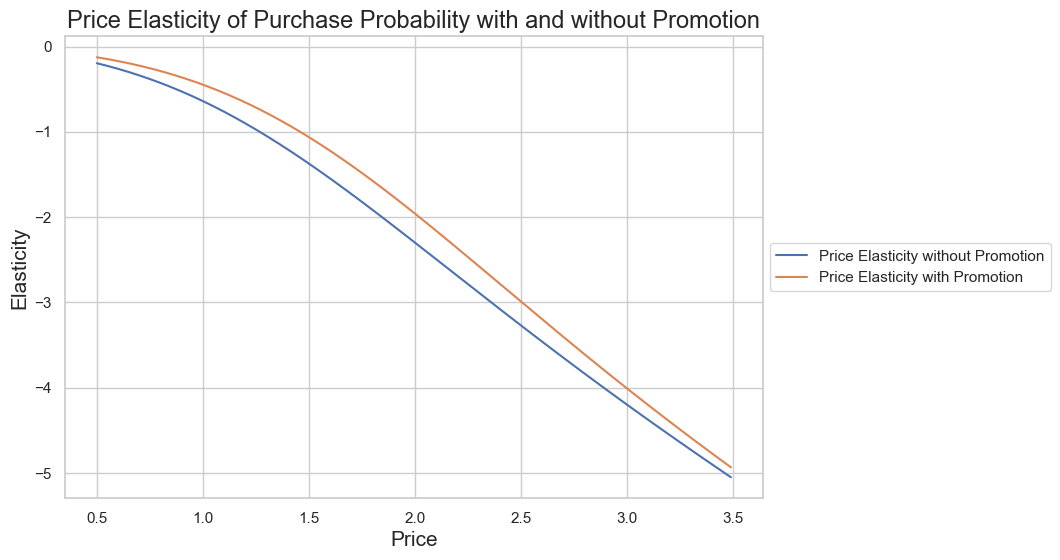

In [130]:
# Plot purchase elasticities with and without promotion.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo, label = 'Price Elasticity without Promotion')
plt.plot(price_range, price_elasticity_prom, label = 'Price Elasticity with Promotion')
plt.xlabel('Price',fontsize =15)
plt.ylabel('Elasticity',fontsize =15)
plt.title('Price Elasticity of Purchase Probability with and without Promotion',fontsize =17)
# Show the legend
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> Note that the two lines in the graph represent the elasticity of purchase probability given maximum and given minimum promotional activity. This graph here tells us that the elasticity curve with promotion sits above its respective no promotion
counterpart for the entire price range. <br>
In addition, when we see the master data frame (df_price_elasticities), we can notice that in elasticity for no promotion ends at 1,27 dollors, while for promotion at 1,46. That's a difference of almost 20 cents.<br><br>
In other words, if a product has a regular price of 1,30 dollars, the purchase probability is elastic. However if a product cost 1,50 dollars on the regular and its price is reduced to the 1,30 dollars during a promotion, then my analysis says that purchase probability is still inelastic at this point.<br><br>
People are more willing to buy products at promotional prices be it because of the large discount signs in some stores or just because psychologically people feel they're getting a bargain. In any case customers are less price sensitive to similar price changes when there are promotion activities. It definitely pays off to offer discounts. It would be more beneficial to have a higher original price and constant promotion rather than a lower original price.